## <font color="yellow"> I.  Data Extraction and Cleansing</font>

### 0 - Non-BBG Data

In [99]:
# Main dataframe for a part of the macro factors
import pandas as pd
import numpy as np
import gold_py_functions as gpf
from datetime import datetime
# Get the current date to rename the resulting file
file_generation_date = datetime.now().strftime("%Y%m%d")
raw_df_sc = pd.read_excel('raw_data_source/main_dataset_raw.xlsx',sheet_name='data')
raw_df_sc

,DATE,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
0,1914-01,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2024-08,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
1328,2024-09,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
1329,2024-10,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243
1330,2024-11,8.417,0.1,NaN,1.958417,1.25,NaN,-16.183557,9.254420,0.026150,NaN,NaN,NaN,-0.234083


### 1 - Extract BBG Dataset

##### <font color= #90EE90>1.0: Read Excel</font>

In [2]:
#Alfred Dataset
#Main, GC2 data, Fed_Eff_Rate, PE; fix index and column labels
bbg_gc_data_file_path = 'raw_data_source/bbg_gc_data.xlsx'
raw_df_al_main = pd.read_excel(bbg_gc_data_file_path,sheet_name='Data')
raw_df_al_gc2 = pd.read_excel(bbg_gc_data_file_path,sheet_name='GC2 COMB COMDTY',skiprows=6)
raw_df_al_fed_eff_rate = pd.read_excel(bbg_gc_data_file_path,sheet_name='Fed_Eff_Rate',skiprows=5)
raw_df_al_pe = pd.read_excel(bbg_gc_data_file_path,sheet_name='PE',skiprows=6)

#another file
data_2_file_path = 'raw_data_source/data2.xlsx'
raw_df_al_dp12 = pd.read_excel(data_2_file_path,sheet_name='DP_12M',skiprows=6)
raw_df_al_gdp_nom_yoy = pd.read_excel(data_2_file_path,sheet_name='GDP_Nom_YoY',skiprows=5) #quarterly
raw_df_al_gdp_real_qoq = pd.read_excel(data_2_file_path,sheet_name='GDP_Real_QoQ',skiprows=5) #quarterly
raw_df_al_cpi_yoy = pd.read_excel(data_2_file_path,sheet_name='CPI_YoY',skiprows=5) #monthly
raw_df_al_unemploy = pd.read_excel(data_2_file_path,sheet_name='US_Unemp',skiprows=5) #monthly
raw_df_al_consumer_conf = pd.read_excel(data_2_file_path,sheet_name='Cons_Conf',skiprows=5) #monthly
raw_df_al_real_int = pd.read_excel(data_2_file_path,sheet_name='US_RIR',skiprows=5) #monthly



#tidy up dataset
raw_df_al_list = [raw_df_al_main, 
                  raw_df_al_gc2, 
                  raw_df_al_fed_eff_rate, 
                  raw_df_al_pe,
                  raw_df_al_dp12,
                  raw_df_al_gdp_nom_yoy,
                  raw_df_al_gdp_real_qoq,
                  raw_df_al_unemploy,
                  raw_df_al_cpi_yoy,
                  raw_df_al_consumer_conf,
                  raw_df_al_real_int]

for df in raw_df_al_list:
    df.set_index(df.columns[0], inplace= True)

print(raw_df_al_gc2.columns)

raw_df_al_gc2.columns = ['GC2_PX_Last', 'GC2_OPEN_INT']
#raw_df_al_fed_eff_rate.columns = ['fed_eff_rate']
raw_df_al_pe.columns = ['PE_RATIO']

raw_df_al_pe = raw_df_al_pe.drop('2025-02-06')
raw_df_al_main = raw_df_al_main.drop('2025-02-06')
raw_df_al_dp12 = raw_df_al_dp12.drop(['2025-02-07','2025-02-06'])
raw_df_al_dp12 = raw_df_al_dp12.drop('PX_LAST', axis = 1)
raw_df_al_dp12


Index(['PX_LAST', 'OPEN_INT'], dtype='object')


,EQY_DVD_YLD_12M
Date,
2025-02-05,1.2402
2025-02-04,1.2446
2025-02-03,1.2536
2025-01-31,1.2438
2025-01-30,1.2368
...,...
1975-01-07,NaN
1975-01-06,NaN
1975-01-03,NaN


In [3]:
risk_free_rate_file_path='raw_data_source/risk_free_rate.xlsx'
raw_df_al_risk_free_rate = pd.read_excel(risk_free_rate_file_path,sheet_name='risk_free_rate')

raw_df_al_risk_free_rate.set_index('Dates',inplace=True)
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.rename(columns={"GB12 Govt": "US00012M Index"})
raw_df_al_risk_free_rate.index = pd.to_datetime(raw_df_al_risk_free_rate.index)
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.resample('M').mean()

raw_df_al_risk_free_rate

,US0001M Index,US0003M Index,US0006M Index,US00012M Index,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.041739
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.201000
1975-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.456190
1975-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.519091
1975-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.219545
...,...,...,...,...,...,...,...,...,...,...
2024-10-31,4.96018,4.85372,4.68213,4.200957,4.954541,4.768959,4.619360,4.408266,4.086912,4.830000
2024-11-30,4.96018,4.85372,4.68213,4.327571,4.773410,4.600914,4.514202,4.413464,4.253799,4.639524
2024-12-31,4.96018,4.85372,4.68213,4.226591,4.588991,4.401243,4.368102,4.294680,4.193468,4.477727


##### <font color= #90EE90>1.1 Modify Columns Names</font>

In [4]:
"""check dataframe"""
print(raw_df_al_gdp_nom_yoy.columns[0])


# Create Column names
col_name_2 = {'D/P Ratio':raw_df_al_dp12,
            'GDP_Nominoal_YOY':raw_df_al_gdp_nom_yoy,
             'GDP_Real_QoQ':raw_df_al_gdp_real_qoq, 
             'CPI_YoY':raw_df_al_cpi_yoy, 
             'US_Unemp': raw_df_al_unemploy, 
             'Cons_Conf': raw_df_al_consumer_conf, 
             'US_RIR':raw_df_al_real_int,
             "Fed_Eff_Rate": raw_df_al_fed_eff_rate
             }


for key, value in col_name_2.items():
    value.rename(columns={value.columns[0]:key},inplace=True)


raw_df_al_main.columns

PX_LAST


Index(['GC1 COMB Comdty (USD)  (R1)', 'GC1 COMB Comdty (USD)_Open Interest',
       'OI_SMAVG (15)', 'GC1 COMB Comdty _Volume', 'Vol_SMAVG (15)',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'CPI YOY Index', 'PCE CYOY Index', 'VIX Index',
       'JPY Curncy', 'LEGATRUU Index', 'EMUSTRUU Index'],
      dtype='object')

##### <font color= #90EE90>1.2 Join More Tables and Set Index Time Starts from 1975</font>

In [5]:
bbg_df = raw_df_al_main.drop(raw_df_al_main.columns[2:5],axis=1)

join_list = [raw_df_al_gc2, raw_df_al_pe]

for key, value in col_name_2.items():
    join_list.append(value)


bbg_df = bbg_df.join(join_list, how='left')

threshold_date = pd.Timestamp('1975-01-01')
bbg_df = bbg_df[bbg_df.index > threshold_date]
mapping = {bbg_df.columns[0]:'GC1_PX_Last',bbg_df.columns[1]:'GC1_OPEN_INT'}
bbg_df.rename(columns=mapping, inplace=True)
col = bbg_df.pop('GC2_PX_Last')
bbg_df.insert(1,'GC2_PX_Last',col)
# Sort by index (ascending order)
bbg_df = bbg_df.sort_index(ascending=True)

print(bbg_df.columns)

raw_df_al_fed_eff_rate[raw_df_al_fed_eff_rate.index> "1975-01-01"]

Index(['GC1_PX_Last', 'GC2_PX_Last', 'GC1_OPEN_INT', 'SPX Index', 'NDX Index',
       'DXY Curncy', 'USGG10YR Index', 'USGG2YR Index', 'CPI YOY Index',
       'PCE CYOY Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'GC2_OPEN_INT', 'PE_RATIO', 'D/P Ratio',
       'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'CPI_YoY', 'US_Unemp', 'Cons_Conf',
       'US_RIR', 'Fed_Eff_Rate'],
      dtype='object')


,Fed_Eff_Rate
Date,
2025-02-05,4.33
2025-02-04,4.33
2025-02-03,4.33
2025-01-31,4.33
2025-01-30,4.33
...,...
1975-01-08,5.12
1975-01-07,7.30
1975-01-06,7.85


### 2 - Cleanse and Create Additional Data

##### 2.1 (Placeholder) Calculate volatility

In [6]:
# Compute δ so that the sum of weights equals 60 days
delta = 60 / (60 + 1)  # δ = 60 / (60 + 1)

# Ensure Date is in datetime format and sorted
bbg_df.index = pd.to_datetime(bbg_df.index, format='%Y-%m-%d')
bbg_df = bbg_df.sort_index()

# Compute daily log returns for the first and second columns
log_returns = pd.DataFrame(index=bbg_df.index)
log_returns['GC1_log_return'] = np.log(bbg_df.iloc[:, 0] / bbg_df.iloc[:, 0].shift(1))
log_returns['GC2_log_return'] = np.log(bbg_df.iloc[:, 1] / bbg_df.iloc[:, 1].shift(1))

# Compute EWMA variance for GC1 and GC2 --> agreed approach
variance = pd.DataFrame(index=bbg_df.index)
variance['GC1_variance'] = log_returns['GC1_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()
variance['GC2_variance'] = log_returns['GC2_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()

# Mask variance before 60 days to NaN
variance.loc[:bbg_df.index[60], ['GC1_variance', 'GC2_variance']] = np.nan

# Compute annualized volatility (square root of variance * 261)
volatility = pd.DataFrame(index=bbg_df.index)
volatility['GC1_volatility'] = np.sqrt(261 * variance['GC1_variance'])
volatility['GC2_volatility'] = np.sqrt(261 * variance['GC2_variance'])

volatility.to_csv('volatility.csv')


##### **<font color= #90EE90>2.2 Fill Nan and Backfill Price Data</font>**

In [7]:
bbg_df = bbg_df.copy(deep=True)

print("Checking NaN in GC2 and GC1 before modification.......")
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])


bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )

#checking
print("\nChecking any NaN left in GC2 .......")
print()
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])

print("\nChecking any NaN left in GC1 .......")
print()
print(bbg_df[bbg_df['GC1_PX_Last'].isna()])

print("\nChecking 2025-01-01 .......")
print(bbg_df.loc['2025-01-01'])

Checking NaN in GC2 and GC1 before modification.......
            GC1_PX_Last  GC2_PX_Last  GC1_OPEN_INT  SPX Index  NDX Index  \
Date                                                                       
1975-02-12          NaN          NaN           NaN  79.919998        NaN   
1975-02-17          NaN          NaN           NaN        NaN        NaN   
1975-03-28          NaN          NaN           NaN        NaN        NaN   
1975-05-26          NaN          NaN           NaN        NaN        NaN   
1975-05-31          NaN          NaN           NaN        NaN        NaN   
...                 ...          ...           ...        ...        ...   
2024-11-28          NaN          NaN           NaN        NaN        NaN   
2024-11-30          NaN          NaN           NaN        NaN        NaN   
2024-12-25          NaN          NaN           NaN        NaN        NaN   
2025-01-01          NaN          NaN           NaN        NaN        NaN   
2025-01-20          NaN          

##### **<font color= #90EE90>2.3 Calculate Daily Gold Return and Daily Risk Free Rate </font>**

**Risk Free Rate**

In [8]:
raw_df_al_risk_free_rate.tail(60)

,US0001M Index,US0003M Index,US0006M Index,US00012M Index,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
2020-03-31,0.917231,1.102355,0.963826,0.319818,1.276407,0.409936,0.349609,0.290991,NaN,0.625455
2020-04-30,0.695701,1.103430,1.082349,0.173409,0.165599,0.051858,0.060563,0.061591,NaN,0.048636
2020-05-31,0.193931,0.403960,0.627193,0.155952,0.033111,0.056217,0.056232,0.052782,NaN,0.050000
2020-06-30,0.183014,0.310259,0.426445,0.172864,0.060486,0.080441,0.079045,0.074659,NaN,0.076818
2020-07-31,0.172226,0.267757,0.339307,0.141435,0.095323,0.087096,0.078717,0.069900,NaN,0.093478
2020-08-31,0.161925,0.252526,0.313140,0.124952,0.097448,0.079643,0.074890,0.071362,NaN,0.094762
2020-09-30,0.151804,0.236889,0.279263,0.122500,0.084974,0.077245,0.075973,0.072209,NaN,0.090000
2020-10-31,0.146081,0.221292,0.247331,0.123000,0.086488,0.077971,0.078767,0.074337,NaN,0.090000
2020-11-30,0.142187,0.220002,0.250251,0.111333,0.088988,0.083151,0.080767,0.076622,NaN,0.086667


In [9]:
#1 Month Risk Free Return Realized from past month
fed_overnight_rate = pd.DataFrame(raw_df_al_risk_free_rate['FEDL01 Index'])
fed_overnight_rate['daily_risk_free_ret'] = np.log(fed_overnight_rate['FEDL01 Index']/261 / 100 + 1) #assume 261 trading days

fed_overnight_rate['1M_risk_free_ret_realized'] = [
    gpf.calculate_monthly_log_rf_ret(date_now,fed_overnight_rate['daily_risk_free_ret'])
    for date_now in fed_overnight_rate.index]

fed_overnight_rate.loc['1975-01-01':'1975-01-30','1M_risk_free_ret_realized'] = np.nan

fed_overnight_rate.to_csv('fed_overnight_rate_df.csv')
fed_overnight_rate

,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-31,7.041739,0.000270,0.000270
1975-02-28,6.201000,0.000238,0.000507
1975-03-31,5.456190,0.000209,0.000209
1975-04-30,5.519091,0.000211,0.000420
1975-05-31,5.219545,0.000200,0.000200
...,...,...,...
2024-10-31,4.830000,0.000185,0.000185
2024-11-30,4.639524,0.000178,0.000363
2024-12-31,4.477727,0.000172,0.000172


**Calculate Return (not yet deduct risk free rate)**

In [10]:
#Create Daily Risk Free Return based on overnight LIBOR rate

Rf_Rate_1M = pd.DataFrame(raw_df_al_risk_free_rate['US0001M Index'])
Rf_Rate_1M.rename(columns = {'US0001M Index':'1M_Risk_Free_Rate'}, inplace=True)
nan_range = Rf_Rate_1M.index[Rf_Rate_1M.iloc[:,0].isna()]
print(nan_range)

fed_overnight_rate

DatetimeIndex(['1975-01-31', '1975-02-28', '1975-03-31', '1975-04-30',
               '1975-05-31', '1975-06-30', '1975-07-31', '1975-08-31',
               '1975-09-30', '1975-10-31',
               ...
               '1984-02-29', '1984-03-31', '1984-04-30', '1984-05-31',
               '1984-06-30', '1984-07-31', '1984-08-31', '1984-09-30',
               '1984-10-31', '1984-11-30'],
              dtype='datetime64[ns]', name='Dates', length=119, freq='ME')


,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-31,7.041739,0.000270,0.000270
1975-02-28,6.201000,0.000238,0.000507
1975-03-31,5.456190,0.000209,0.000209
1975-04-30,5.519091,0.000211,0.000420
1975-05-31,5.219545,0.000200,0.000200
...,...,...,...
2024-10-31,4.830000,0.000185,0.000185
2024-11-30,4.639524,0.000178,0.000363
2024-12-31,4.477727,0.000172,0.000172


In [11]:
# Define the columns to keep with original values
keep_columns = [
    "CPI YOY Index", "PCE CYOY Index", "GDP_Nominoal_YOY", "GDP_Real_QoQ",
    "CPI_YoY", "US_Unemp", "Cons_Conf", "US_RIR", 
]


# Calculate log returns for all columns except those in keep_columns
log_return_df = np.log(bbg_df.drop(columns=keep_columns, errors='ignore')).diff()


# Combine the original values of the specified columns with the log returns of the remaining columns
bbg_df_log_rets = pd.concat([log_return_df,bbg_df[keep_columns]], axis=1)
bbg_df_log_rets = bbg_df_log_rets.iloc[1:]
bbg_df_log_rets = bbg_df_log_rets.rename(columns={'GC1_PX_Last': 'GC1_Monthly_raw_Return','GC2_PX_Last': 'GC2_Monthly_raw_Return'}) #Update column name first, although up to this point is still daily data
bbg_df_log_rets

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,D/P Ratio,Fed_Eff_Rate,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-03,-0.002287,-0.003936,NaN,0.006811,NaN,-0.005542,0.001346,NaN,NaN,0.000599,...,NaN,-0.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,-0.001719,-0.003951,NaN,0.005078,NaN,-0.005676,-0.005397,NaN,NaN,0.000598,...,NaN,-0.064140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,-0.005750,-0.005672,NaN,-0.000704,NaN,0.000207,-0.001354,NaN,NaN,-0.000299,...,NaN,-0.072639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,0.022806,0.025830,NaN,-0.013895,NaN,0.005161,0.001354,NaN,NaN,-0.000598,...,NaN,-0.354720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-09,0.005061,0.002768,NaN,0.016005,NaN,-0.002061,-0.005426,NaN,NaN,0.000299,...,NaN,0.350602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,0.019025,0.018338,-0.270892,0.005262,0.004504,-0.001881,-0.002676,-0.001473,-0.044452,-0.006010,...,-0.005483,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,-0.003726,-0.003591,-0.690890,-0.005060,-0.001399,0.005301,0.004948,-0.002427,0.036571,0.005816,...,0.005644,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,0.007580,0.007765,-0.400028,-0.007638,-0.008438,0.005705,0.003585,0.012266,0.125127,-0.002969,...,0.007848,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **<font color= #90EE90>2.4 Resample to Monthly Data</font>**

**Resampling**

In [12]:
#when resampling, sum up the return in months to get monthly_ret (from 1st day to last day of month)
bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
bbg_df_monthly_only = bbg_df_monthly_only.loc[:"2024-12-31"] #until 2024-12-31


# Compute monthly mean volatility (AC: agreed approach: monthly mean of the annualized vol)
volatility_monthly = volatility.resample('M').mean()

# Merge with bbg_df_monthly_only, keeping all indices from bbg_df_monthly_only
bbg_df_monthly_only = bbg_df_monthly_only.merge(volatility_monthly, how='left', left_index=True, right_index=True)


#Include Risk-Free Rate Return
bbg_df_monthly_only  = bbg_df_monthly_only .join(fed_overnight_rate['1M_risk_free_ret_realized'],how='left')
bbg_df_monthly_only['1M_risk_free_ret_realized'].fillna(method = 'ffill' , inplace= True )

bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.000270
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.000507
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.000209
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.000420
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.000204
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.000401
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.000185


**Subtract Monthly Return with Risk-Free Return**

In [13]:
bbg_df_monthly_only['GC1_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']
bbg_df_monthly_only['GC2_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']

bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.000270,0.002012,0.002012
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.000507,0.041340,0.041340
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.000209,-0.032981,-0.032981
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.000420,-0.060340,-0.060340
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.000200,-0.002000,-0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.000204,0.031435,0.031435
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.000401,0.050810,0.050810
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.000185,0.041861,0.041861


##### **<font color= #90EE90>2.5 Create Time Series Momentum Data</font>**

**Calculate Realized Return and Sign**

In [14]:
#1M Return
bbg_df_monthly_only['GC1_1M_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return']
bbg_df_monthly_only['GC2_1M_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return']

# 1M sign
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Excess_Return'])
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Excess_Return'])

#--------------------

# 3M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_3M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

bbg_df_monthly_only['GC2_3M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

# Calculate 3M sign
bbg_df_monthly_only['GC1_3M_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Ret'])
bbg_df_monthly_only['GC2_3M_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Ret'])

#--------------------

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_6M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
bbg_df_monthly_only['GC2_6M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
# Calculate 6M sign
bbg_df_monthly_only['GC1_6M_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Ret'])
bbg_df_monthly_only['GC2_6M_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Ret'])

#--------------------

# 12M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_12M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)
bbg_df_monthly_only['GC2_12M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)


# Calculate 12M sign
bbg_df_monthly_only['GC1_12M_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Ret'])
bbg_df_monthly_only['GC2_12M_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Ret'])


#checking log return
bbg_df_monthly_only[['GC2_Monthly_Excess_Return','GC2_12M_Ret','GC2_6M_Ret','GC2_3M_Ret']].head(24)
#bbg_df_monthly_only


,GC2_Monthly_Excess_Return,GC2_12M_Ret,GC2_6M_Ret,GC2_3M_Ret
Date,,,,
1975-01-31,0.002012,NaN,NaN,NaN
1975-02-28,0.041340,NaN,NaN,NaN
1975-03-31,-0.032981,NaN,NaN,0.010371
1975-04-30,-0.060340,NaN,NaN,-0.051980
1975-05-31,-0.002000,NaN,NaN,-0.095320
1975-06-30,0.007366,NaN,-0.044603,-0.054974
1975-07-31,-0.001426,NaN,-0.048041,0.003940
1975-08-31,-0.045392,NaN,-0.134772,-0.039452
1975-09-30,-0.131689,NaN,-0.233480,-0.178506


**Forward Return and Sign**

In [15]:
# ===== Calculate Actual Return in Forward-Looking Style : Next X Month Return =====

# 1M Fwd return
bbg_df_monthly_only['GC1_1M_Fwd_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return'].shift(-1)
bbg_df_monthly_only['GC2_1M_Fwd_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return'].shift(-1)

# 1M Sign
bbg_df_monthly_only['GC1_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_1M_Fwd_Ret'])
bbg_df_monthly_only['GC2_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_1M_Fwd_Ret'])

#--------------------

# Forward-looking 3M return
bbg_df_monthly_only['GC1_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
bbg_df_monthly_only['GC2_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)
# # Forward-looking 3M return
# bbg_df_monthly_only['GC1_3M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=3)
#     .sum()
#     .shift(-2)
# )
# bbg_df_monthly_only['GC2_3M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=3)
#     .sum()
#     .shift(-2)  # forward-looking return
# )

# 3M forward sign
bbg_df_monthly_only['GC1_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Fwd_Ret'])
bbg_df_monthly_only['GC2_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Fwd_Ret'])

#--------------------

# Forward-looking 6M return
bbg_df_monthly_only['GC1_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC2_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)

# # Forward-looking 6M return
# bbg_df_monthly_only['GC1_6M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=6)
#     .sum()
#     .shift(-5)
# )
# bbg_df_monthly_only['GC2_6M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=6)
#     .sum()
#     .shift(-5)
# )

# 6M forward sign
bbg_df_monthly_only['GC1_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Fwd_Ret'])
bbg_df_monthly_only['GC2_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Fwd_Ret'])

#--------------------

# Forward-looking 12M return
bbg_df_monthly_only['GC1_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC2_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)

# # Forward-looking 12M return
# bbg_df_monthly_only['GC1_12M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=12)
#     .sum()
#     .shift(-11)
# )
# bbg_df_monthly_only['GC2_12M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=12)
#     .sum()
#     .shift(-11)
# )

# 12M forward sign
bbg_df_monthly_only['GC1_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Fwd_Ret'])
bbg_df_monthly_only['GC2_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Fwd_Ret'])

#--------------------
bbg_df_monthly_only[['GC1_3M_Fwd_Ret','GC1_3M_Ret','GC1_12M_Fwd_Ret','GC1_12M_Ret']].head(20)


,GC1_3M_Fwd_Ret,GC1_3M_Ret,GC1_12M_Fwd_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,0.010371,NaN,-0.220399,NaN
1975-02-28,-0.051980,NaN,-0.317765,NaN
1975-03-31,-0.095320,0.010371,-0.325728,NaN
1975-04-30,-0.054974,-0.051980,-0.319683,NaN
1975-05-31,0.003940,-0.095320,-0.261264,NaN
1975-06-30,-0.039452,-0.054974,-0.282222,NaN
1975-07-31,-0.178506,0.003940,-0.306807,NaN
1975-08-31,-0.161066,-0.039452,-0.405668,NaN
1975-09-30,-0.155371,-0.178506,-0.447085,NaN


**Lag_1 Return and Sign**

In [16]:
bbg_df_monthly_only.drop(['GC1_OPEN_INT','GC2_OPEN_INT'],axis=1, inplace = True)

In [17]:
lag_1_col_gc = ['GC1_3M_Ret','GC2_3M_Ret','GC1_6M_Ret','GC2_6M_Ret','GC1_12M_Ret','GC2_12M_Ret',
                'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in lag_1_col_gc:
    bbg_df_monthly_only[col+'_lag_1']=bbg_df_monthly_only[col].shift(1)

lag_col_name = [col+'_lag_1' for col in lag_1_col_gc]

bbg_df_monthly_only.to_excel(f"generated_dataframe/bbg_df_monthly_only_{file_generation_date}.xlsx")
bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,...,GC1_6M_Ret_lag_1,GC2_6M_Ret_lag_1,GC1_12M_Ret_lag_1,GC2_12M_Ret_lag_1,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.041847,0.043425,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,-0.032772,-0.035034,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,-0.059919,-0.060868,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1975-05-31,-0.001800,0.000592,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,...,0.167553,0.167553,0.204691,0.204691,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.051211,0.050830,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,...,0.196326,0.196326,0.248328,0.248328,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.042046,0.042190,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,...,0.171135,0.171135,0.351679,0.351679,1.0,1.0,1.0,1.0,1.0,1.0


**Checking**

In [18]:
#checking Next X month Return
bbg_df_monthly_only[['GC2_12M_Fwd_Ret','GC2_Monthly_Excess_Return']].head(24)

,GC2_12M_Fwd_Ret,GC2_Monthly_Excess_Return
Date,,
1975-01-31,-0.220399,0.002012
1975-02-28,-0.317765,0.041340
1975-03-31,-0.325728,-0.032981
1975-04-30,-0.319683,-0.060340
1975-05-31,-0.261264,-0.002000
1975-06-30,-0.282222,0.007366
1975-07-31,-0.306807,-0.001426
1975-08-31,-0.405668,-0.045392
1975-09-30,-0.447085,-0.131689


**Reorder Columns**

In [19]:
#Reorder columns

new_order_part1 = list(bbg_df_monthly_only.columns[0:2]) + [
    'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
    'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
    'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret',
    'GC2_3M_Sign', 'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret',
    'GC2_6M_Sign', 'GC1_6M_Sign', 'GC2_12M_Ret', 'GC1_12M_Ret',
    'GC2_12M_Sign', 'GC1_12M_Sign',
] + lag_col_name + ['GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign']

new_forward_looking_cols = [
    'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret', 'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign',
    'GC2_6M_Fwd_Ret', 'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
    'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC2_12M_Fwd_Sign', 'GC1_12M_Fwd_Sign'
]
# Create new column variants by adding a "_raw" version for each column
new_forward_looking_cols_with_ = new_forward_looking_cols + [col.replace("_Fwd_", "_Fwd_raw_") for col in new_forward_looking_cols]

final_column_order = new_order_part1 + new_forward_looking_cols

new_order = final_column_order + [col for col in bbg_df_monthly_only.columns if col not in final_column_order]
bbg_df_by_month = bbg_df_monthly_only.loc[:,new_order]
bbg_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,Fed_Eff_Rate,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,-0.234908,11.8,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,0.000270
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-0.107664,11.2,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,0.000507
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-0.118813,10.3,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.000209
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,0.265641,10.2,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.000420
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-0.295775,9.5,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,0.000000,2.5,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.000204
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,-0.098505,2.4,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.000401
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,0.000000,2.6,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.000185


##### **<font color= #90EE90>2.6 Modify Non-BBG Dataset</font>**

In [20]:
#Before change
#print(raw_df_sc.iloc[:,0])

#After change
raw_df_sc['DATE'] = pd.to_datetime(raw_df_sc['DATE'], format='%Y-%m') + pd.offsets.MonthEnd(0)

raw_df_sc.set_index(raw_df_sc.columns[0],inplace = True)

raw_df_sc

,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
DATE,,,,,,,,,,,,,
1914-01-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02-28,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04-30,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
2024-09-30,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
2024-10-31,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243


In [21]:
#Join with BBG Dataframe
selected_cols = ['ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount', 'PPI']

partial_df_sc = raw_df_sc[selected_cols]

print(partial_df_sc)
partial_df_sc.index

            ETF_Ounces  Chinese_premium_discount  Indian_premium_discount  PPI
DATE                                                                          
1914-01-31         NaN                       NaN                      NaN -2.5
1914-02-28         NaN                       NaN                      NaN -1.7
1914-03-31         NaN                       NaN                      NaN -2.5
1914-04-30         NaN                       NaN                      NaN -2.5
1914-05-31         NaN                       NaN                      NaN -2.5
...                ...                       ...                      ...  ...
2024-08-31         NaN                 -1.526427                 5.831219 -0.9
2024-09-30         NaN                -11.192383                -2.388517 -2.4
2024-10-31         NaN                -13.455145                 0.537662 -0.9
2024-11-30         NaN                -16.183557                 9.254420  0.1
2024-12-31         NaN                 -3.335864    

DatetimeIndex(['1914-01-31', '1914-02-28', '1914-03-31', '1914-04-30',
               '1914-05-31', '1914-06-30', '1914-07-31', '1914-08-31',
               '1914-09-30', '1914-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1332, freq=None)

In [22]:
combined_df_by_month = bbg_df_by_month.join(partial_df_sc,how='left')
combined_df_by_month.index=pd.to_datetime(combined_df_by_month.index, format='%Y-%m')
combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill')
combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill')
combined_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


##### **<font color= #90EE90>2.7 Export Dataframe for Review</font>**

In [23]:
combined_df_by_month.to_excel(f'generated_dataframe/combined_df_by_month_{file_generation_date}.xlsx')

combined_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


### __________________________________________________________________________________

## <font color="yellow"> II.  Build Training Model</font>

### 3 - Define X and Y Dataframe

##### **<font color= #90EE90>3.1   X1: Macro Factors </font>**

In [24]:
x_variables_data = combined_df_by_month.loc[:,'SPX Index':]
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


In [25]:
#Remove unnecessary/ duplicated macro factors
x_variables_data.drop(['CPI_YoY'],axis=1,inplace= True)

x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

In [26]:
# x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
# x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")
# x_variables_data.head(20)

##### **<font color= #90EE90>3.2 X2: Gold Futures Price - Time Series Momentum Data </font>**

In [27]:
gc_data = combined_df_by_month.loc[:,:'SPX Index']
gc_data.drop('SPX Index', axis=1, inplace = True)
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,1.0,1.0,-0.044603,-0.044603,-1.0,-1.0,-0.220399,-0.220399,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-1.0,-1.0,-0.048041,-0.048041,-1.0,-1.0,-0.317765,-0.317765,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-1.0,-1.0,-0.134772,-0.134772,-1.0,-1.0,-0.325728,-0.325728,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-1.0,-1.0,-0.233480,-0.233480,-1.0,-1.0,-0.319683,-0.319683,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,1.0,1.0,-0.157126,-0.157126,-1.0,-1.0,-0.261264,-0.261264,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
gc_data.to_excel(f"generated_dataframe/gc_data_checking_{file_generation_date}.xlsx")

### 4 - Establish and Train Model - Part 1: LASSO/ Feature Selection

##### **<font color= #90EE90>4.1 Import Library</font>**

In [29]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
warnings.filterwarnings("ignore")

##### **<font color= #90EE90>4.2 Select Training Data for X and Y</font>**

In [30]:
GC_type = 'GC1'        #Gold Futures Type
fwd_ret_period=6       #holding period return to predict

Y = pd.DataFrame(gc_data[f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all"))
cols_to_merge = [f'{GC_type}_Monthly_Return', f'{GC_type}_3M_Ret', f'{GC_type}_6M_Ret', f'{GC_type}_12M_Ret']

Y #realized return after N months

,GC1_6M_Fwd_Ret
Date,
1975-01-31,-0.044603
1975-02-28,-0.048041
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


In [31]:
x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

**Training Data for X**

In [32]:
#Should modify!! some x variables should not fill na with 0
#suggest ffill or interpolation for GDP and CPI index 
#suggest modify dataset for macro factors: GDP, Inflation, Unemployment, PPI <--- these shoud be beat/ miss expectation rather than a value

X1 = x_variables_data.fillna(0).copy() 

#Intercept
X1 = sm.add_constant(X1)  

X1.to_excel(f"generated_dataframe/X1_{file_generation_date}.xlsx")

print(X1.columns)
X1

Index(['const', 'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,1.0,0.091770,0.000000,-0.021726,0.014712,0.000000,0.000000,-0.008987,0.000000,0.000000,...,0.0,0.0,8.1,0.0,-4.8026,0.000270,0.0,0.000000,0.000000,17.1
1975-02-28,1.0,0.065179,0.000000,-0.019899,-0.002461,0.000000,0.000000,-0.039429,0.000000,0.000000,...,0.0,0.0,8.1,0.0,-5.2288,0.000507,0.0,0.000000,0.000000,14.4
1975-03-31,1.0,0.027323,0.000000,0.019908,0.079816,0.000000,0.000000,0.026118,0.000000,0.000000,...,8.4,-4.7,8.6,0.0,-4.7510,0.000209,0.0,0.000000,0.000000,12.5
1975-04-30,1.0,0.046182,0.000000,0.005993,0.036760,0.000000,0.000000,-0.006141,0.000000,0.000000,...,8.4,-4.7,8.8,0.0,-4.9583,0.000420,0.0,0.000000,0.000000,12.7
1975-05-31,1.0,0.045809,0.000000,-0.007999,-0.028024,0.000000,0.000000,-0.002330,0.000000,0.000000,...,8.4,-4.7,9.0,0.0,-4.2150,0.000200,0.0,0.000000,0.000000,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,1.0,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,...,5.7,3.0,4.2,67.9,2.8443,0.000204,0.0,-1.526427,5.831219,-0.9
2024-09-30,1.0,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,...,5.0,3.1,4.1,70.1,2.4344,0.000401,0.0,-11.192383,-2.388517,-2.4
2024-10-31,1.0,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,...,5.0,3.1,4.1,70.5,2.2771,0.000185,0.0,-13.455145,0.537662,-0.9


**Filter X2 GC Data for Training**

In [33]:
gc_data.columns

Index(['GC1_Monthly_raw_Return', 'GC2_Monthly_raw_Return',
       'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
       'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
       'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret', 'GC2_3M_Sign',
       'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret', 'GC2_6M_Sign', 'GC1_6M_Sign',
       'GC2_12M_Ret', 'GC1_12M_Ret', 'GC2_12M_Sign', 'GC1_12M_Sign',
       'GC1_3M_Ret_lag_1', 'GC2_3M_Ret_lag_1', 'GC1_6M_Ret_lag_1',
       'GC2_6M_Ret_lag_1', 'GC1_12M_Ret_lag_1', 'GC2_12M_Ret_lag_1',
       'GC1_3M_Sign_lag_1', 'GC2_3M_Sign_lag_1', 'GC1_6M_Sign_lag_1',
       'GC2_6M_Sign_lag_1', 'GC1_12M_Sign_lag_1', 'GC2_12M_Sign_lag_1',
       'GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign', 'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret',
       'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign', 'GC2_6M_Fwd_Ret',
       'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
       'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC

In [34]:
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret_lag_1','6M_Ret_lag_1','12M_Ret_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign_lag_1','6M_Sign_lag_1','12M_Sign_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign','6M_Sign','12M_Sign']]
x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret','6M_Ret','12M_Ret']]


#x2_required_cols

X2 = gc_data[x2_required_cols]

X2 = X2.fillna(0)

X2.head(20)

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,0.002012,0.000000,0.000000,0.000000
1975-02-28,0.041340,0.000000,0.000000,0.000000
1975-03-31,-0.032981,0.010371,0.000000,0.000000
1975-04-30,-0.060340,-0.051980,0.000000,0.000000
1975-05-31,-0.002000,-0.095320,0.000000,0.000000
1975-06-30,0.007366,-0.054974,-0.044603,0.000000
1975-07-31,-0.001426,0.003940,-0.048041,0.000000
1975-08-31,-0.045392,-0.039452,-0.134772,0.000000
1975-09-30,-0.131689,-0.178506,-0.233480,0.000000


**Combine X1 and X2 Data to X for next step**

In [35]:
X = X2.join(X1,how='left')
#X=X2
print(X.columns)

X=X.shift(1)
X["GDP_Nominoal_YOY"]=X["GDP_Nominoal_YOY"].shift(1)
X["GDP_Real_QoQ"]=X["GDP_Real_QoQ"].shift(1)
X["CPI YOY Index"]=X["CPI YOY Index"].shift(1)
X["US_Unemp"]=X["US_Unemp"].shift(1)
X["PPI"]=X["PPI"].shift(1)
X = X.dropna()

Index(['GC1_1M_Ret', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret', 'const',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


**Training Data for Y**

In [36]:
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,1.0,1.0,-0.044603,-0.044603,-1.0,-1.0,-0.220399,-0.220399,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-1.0,-1.0,-0.048041,-0.048041,-1.0,-1.0,-0.317765,-0.317765,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-1.0,-1.0,-0.134772,-0.134772,-1.0,-1.0,-0.325728,-0.325728,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-1.0,-1.0,-0.233480,-0.233480,-1.0,-1.0,-0.319683,-0.319683,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,1.0,1.0,-0.157126,-0.157126,-1.0,-1.0,-0.261264,-0.261264,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Y = Y.loc[X.index[0]:]
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.loc[Y.index]

n_obs = len(Y)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].dropna(how='all')

#refine the scope of Y here if needed
Y #view y dataset again

,GC1_6M_Fwd_Ret
Date,
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
1975-06-30,-0.194823
1975-07-31,-0.175796
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


**Check X**

In [38]:
X.columns

Index(['GC1_1M_Ret', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret', 'const',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

In [39]:
X.to_excel(f"generated_dataframe/check_X_{file_generation_date}.xlsx")

**Check Y**

In [40]:
Y.to_excel(f"generated_dataframe/check_Y_{file_generation_date}.xlsx")

##### **<font color= #90EE90>4.3 LASSO - Parameters Selection</font>**

**Training Parameters**

In [41]:
#LASSO Training Parameters

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(-2,-5,50).tolist() #gives more parameters to study for lower penalisation 

In [42]:
#Clear List for Next Checking
# model_coefficients.clear()
# results.clear()
# results_df = None

##### **4.3.2 LASSO - While Loop**

**Train - Calibrate - Test Split**

In [43]:
#Define x features standardization needs for Lasso 
x1_standarize = False
x1x2_standardize = True

In [44]:
preprocessor = gpf.build_preprocessor(x1_standarize, x1x2_standardize, X1, X2, X)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')
results = []
LASSO_result= []
model_coefficients = []
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
pbar = tqdm(total=Y.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= Y.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    y_historical_mean = y_historical_mean_data.loc[:test_date]
    #create train dataset
    X_train = X.loc[:train_end]
    Y_train = Y.loc[:train_end]

    #create calibration dataset
    X_calib = X.loc[calib_start:calib_end]
    Y_calib = Y.loc[calib_start:calib_end]
        
    #test data
    X_test = X.loc[test_date:test_date]
    y_actual = Y.loc[test_date:test_date]

    #Transform dataset if needed
    if x1_standarize or x1x2_standardize:
        preprocessor.fit(X_train)
        
        X_train = pd.DataFrame(preprocessor.transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
        
        X_calib = pd.DataFrame(preprocessor.transform(X_calib),
                               columns=X_calib.columns,
                               index=X_calib.index)
        
        X_test = pd.DataFrame(preprocessor.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)

        
    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
        
        #fit the model in the calibration set
        candidate_model.fit(X_train, Y_train)
        Y_pred = candidate_model.predict(X_calib)
        error = mean_squared_error(Y_calib,Y_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    X_combined = pd.concat([X_train,X_calib])
    Y_combined = pd.concat([Y_train,Y_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(X_combined, Y_combined)
    
    #forecasting the test month
    forecast = final_model.predict(X_test)[0]
    realized = y_actual.iloc[0,0]
     
    LASSO_result.append({
        "Date": test_date,
        "ret_real": float(realized),
        "ret_pred": float(forecast),
        "historical_mean": y_historical_mean.mean() * fwd_ret_period
    })
    
    #Iteration Results
    model_stat = {
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error,
        
    }
    coeff_stat = pd.Series(final_model.coef_,index=X.columns).to_dict()
    model_stat.update(coeff_stat)

    results.append(model_stat)
    results_df = pd.DataFrame(results)

    
    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{Y.loc[test_date:].shape[0]}")
    pbar.update(1)


pbar.close()

results_df = pd.DataFrame(results)

Rolling Window Iterations: 344/0: 100%|██████████| 343/343 [00:54<00:00,  6.34it/s]  


In [45]:
pd.DataFrame([LASSO_result])

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,"{'Date': 1996-01-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-02-29 00:00:00, 'ret_real': -0.0...","{'Date': 1996-03-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-04-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-05-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-06-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-07-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-08-31 00:00:00, 'ret_real': -0.1...","{'Date': 1996-09-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-10-31 00:00:00, 'ret_real': -0.0...",...,"{'Date': 2023-10-31 00:00:00, 'ret_real': 0.18...","{'Date': 2023-11-30 00:00:00, 'ret_real': 0.14...","{'Date': 2023-12-31 00:00:00, 'ret_real': 0.12...","{'Date': 2024-01-31 00:00:00, 'ret_real': 0.11...","{'Date': 2024-02-29 00:00:00, 'ret_real': 0.16...","{'Date': 2024-03-31 00:00:00, 'ret_real': 0.19...","{'Date': 2024-04-30 00:00:00, 'ret_real': 0.17...","{'Date': 2024-05-31 00:00:00, 'ret_real': 0.17...","{'Date': 2024-06-30 00:00:00, 'ret_real': 0.13...","{'Date': 2024-07-31 00:00:00, 'ret_real': 0.11..."


In [46]:
# LASSO_result=pd.DataFrame(LASSO_result)
# LASSO_result

In [47]:
results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
0,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.029132,-0.002391,-0.018247,-0.000000,-0.000467,-0.0,0.0,0.000000,0.0,-0.015895
1,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.029238,-0.002372,-0.018020,-0.000000,-0.000461,-0.0,0.0,0.000000,0.0,-0.015822
2,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.029437,-0.002310,-0.017667,-0.000000,-0.000489,-0.0,0.0,0.000000,0.0,-0.015611
3,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.029432,-0.002151,-0.017479,-0.000000,-0.000482,-0.0,0.0,0.000000,0.0,-0.015401
4,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.029565,-0.002037,-0.017183,-0.000000,-0.000397,-0.0,0.0,0.000000,0.0,-0.015180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.006551,0.086104,0.196326,0.009300,-0.0,0.0,...,0.003742,-0.000392,-0.004130,-0.001538,-0.000000,-0.0,-0.0,0.005389,0.0,-0.001339
339,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.006551,0.074616,0.171135,0.009558,-0.0,0.0,...,0.003716,-0.000446,-0.004259,-0.001556,-0.000000,-0.0,-0.0,0.005873,0.0,-0.001690
340,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.006551,0.092569,0.175570,0.009682,-0.0,0.0,...,0.003593,-0.000427,-0.004429,-0.001563,-0.000000,-0.0,-0.0,0.006122,-0.0,-0.001870
341,2019-05-31,2019-06-30,2024-05-31,2024-06-30,0.006551,0.096665,0.132616,0.009572,-0.0,0.0,...,0.003517,-0.000477,-0.004500,-0.001539,-0.000000,-0.0,-0.0,0.006488,-0.0,-0.002007


In [48]:
Y.columns

Index(['GC1_6M_Fwd_Ret'], dtype='object')

In [49]:
#calcualte historical expanding mean
results_df = pd.DataFrame(results)

Y.loc[train_start:,Y.columns[0]]

expanding_mean = pd.DataFrame(Y.loc[train_start:,Y.columns[0]].expanding(min_periods=1).mean())
expanding_mean.rename(columns={expanding_mean.columns[0]:'hist_mean'},inplace=True)
#expanding_mean


results_df.set_index('test_date',drop=False, inplace=True)

#results_df.join(expanding_mean,how="left")

results_df = results_df.join(expanding_mean,how='left')

results_df['SSE_hist'] = (results_df['realized'] - results_df['hist_mean']) **2
results_df['SSE_forecast'] = (results_df['realized'] - results_df['forecast']) **2
results_df['SSE_difference'] = results_df['SSE_hist'] - results_df['SSE_forecast']
results_df['Cum_SSE_difference'] = results_df['SSE_difference'].expanding(min_periods=1).sum()


# results_df['MSE_hist'] = results_df['SSE_hist'].expanding(min_periods=1).mean()
# results_df['MSE_forecast'] = results_df['SSE_forecast'].expanding(min_periods=1).mean()
# results_df['RMSE_change'] = np.sqrt(results_df['MSE_hist']) - np.sqrt(results_df['MSE_forecast'])
# results_df['Cumm_RMSE_change'] = results_df['RMSE_change'].expanding(min_periods=1).sum()

In [50]:
results_df['Cum_SSE_hist'] = results_df['SSE_hist'].expanding(min_periods=1).sum()
results_df['Cum_SSE_forecast'] = results_df['SSE_forecast'].expanding(min_periods=1).sum()
results_df['OOS_R_Sq'] = 1 - (results_df['Cum_SSE_forecast']/results_df['Cum_SSE_hist'])

results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,Indian_premium_discount,PPI,hist_mean,SSE_hist,SSE_forecast,SSE_diff,Cum_SSE_diff,Cum_SSE_hist,Cum_SSE_forecast,OOS_R_Sq
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.0,-0.015895,0.024879,0.001902,0.001028,0.000874,0.000874,0.001902,0.001028,0.459367
1996-02-29,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.0,-0.015822,0.024580,0.005194,0.003994,0.001200,0.002074,0.007096,0.005022,0.292252
1996-03-31,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.0,-0.015611,0.024338,0.003439,0.000658,0.002781,0.004855,0.010535,0.005680,0.460826
1996-04-30,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.0,-0.015401,0.024039,0.005281,0.001852,0.003429,0.008284,0.015816,0.007532,0.523751
1996-05-31,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.0,-0.015180,0.023782,0.003929,0.001682,0.002247,0.010531,0.019746,0.009215,0.533328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.006551,0.086104,0.196326,0.009300,-0.0,0.0,...,0.0,-0.001339,0.028408,0.028197,0.012149,0.016048,-0.406391,3.445786,3.852176,-0.117938
2024-04-30,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.006551,0.074616,0.171135,0.009558,-0.0,0.0,...,0.0,-0.001690,0.028654,0.020301,0.009316,0.010985,-0.395405,3.466087,3.861492,-0.114078
2024-05-31,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.006551,0.092569,0.175570,0.009682,-0.0,0.0,...,-0.0,-0.001870,0.028906,0.021510,0.006889,0.014621,-0.380784,3.487597,3.868381,-0.109182


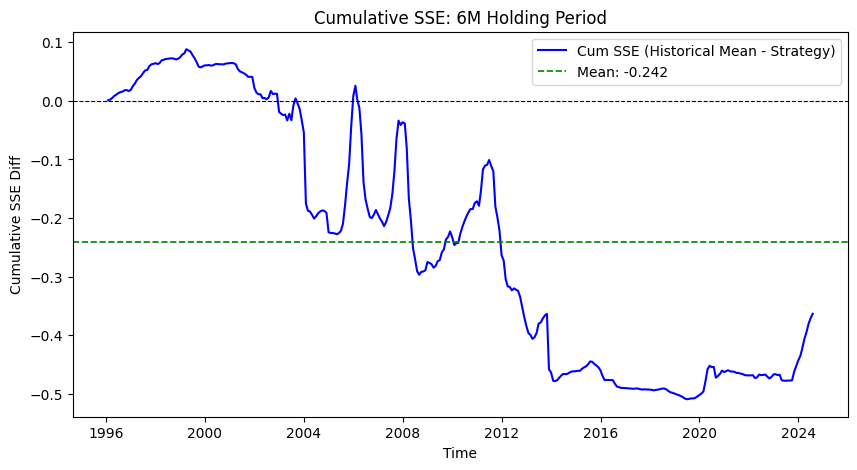

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(results_df.index, results_df['Cum_SSE_difference'], label="Cum SSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")

#mean value
mean_value = results_df['Cum_SSE_difference'][:].mean()
plt.axhline(y=mean_value, color='green', linestyle='--', linewidth=1.2, label=f"Mean: {mean_value:.3f}")

plt.ylabel("Cumulative SSE Difference")
plt.title(f"Cumulative SSE Difference: {fwd_ret_period}M Holding Period")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

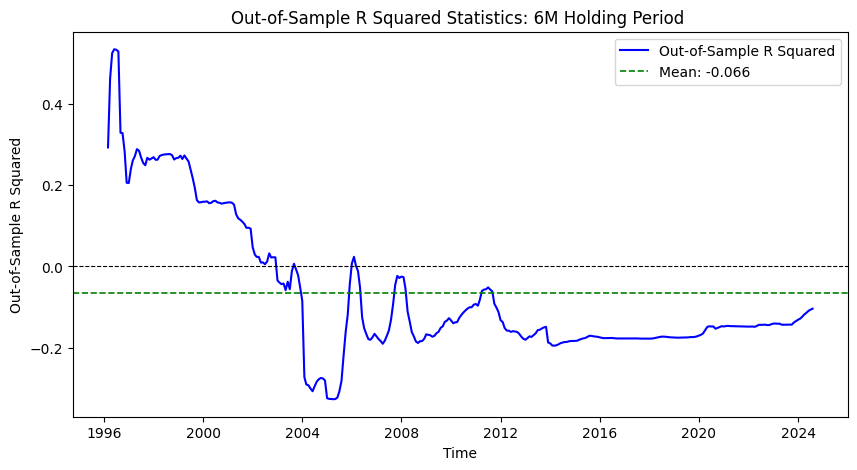

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(results_df.iloc[1:].index, results_df['OOS_R_Sq'][1:], label="Out-of-Sample R Squared", color='blue') 
#omited the first data as it is noisy and makes the graph looks better to be explained in presentation, can change it back if we deep dive

#mean value of OOS R Sq
mean_value = results_df['OOS_R_Sq'][:].mean()
plt.axhline(y=mean_value, color='green', linestyle='--', linewidth=1.2, label=f"Mean: {mean_value:.3f}")

plt.xlabel("Time")
plt.ylabel("Out-of-Sample R Squared")
plt.title(f"Out-of-Sample R Squared Statistics: {fwd_ret_period}M Holding Period ")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

In [53]:
results_df.to_excel(f"generated_dataframe/GC1_6M_{file_generation_date}_x1(std)x2(std)_lasso.xlsx")

results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,Indian_premium_discount,PPI,hist_mean,SSE_hist,SSE_forecast,SSE_diff,Cum_SSE_diff,Cum_SSE_hist,Cum_SSE_forecast,OOS_R_Sq
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.0,-0.015895,0.024879,0.001902,0.001028,0.000874,0.000874,0.001902,0.001028,0.459367
1996-02-29,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.0,-0.015822,0.024580,0.005194,0.003994,0.001200,0.002074,0.007096,0.005022,0.292252
1996-03-31,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.0,-0.015611,0.024338,0.003439,0.000658,0.002781,0.004855,0.010535,0.005680,0.460826
1996-04-30,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.0,-0.015401,0.024039,0.005281,0.001852,0.003429,0.008284,0.015816,0.007532,0.523751
1996-05-31,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.0,-0.015180,0.023782,0.003929,0.001682,0.002247,0.010531,0.019746,0.009215,0.533328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.006551,0.086104,0.196326,0.009300,-0.0,0.0,...,0.0,-0.001339,0.028408,0.028197,0.012149,0.016048,-0.406391,3.445786,3.852176,-0.117938
2024-04-30,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.006551,0.074616,0.171135,0.009558,-0.0,0.0,...,0.0,-0.001690,0.028654,0.020301,0.009316,0.010985,-0.395405,3.466087,3.861492,-0.114078
2024-05-31,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.006551,0.092569,0.175570,0.009682,-0.0,0.0,...,-0.0,-0.001870,0.028906,0.021510,0.006889,0.014621,-0.380784,3.487597,3.868381,-0.109182


### 5 - Establish and Train Model - Part 2: Random Forest Study

##### **<font color= #90EE90>5.1 Prediction result using Random Forest </font>**

In [74]:
testing_start_date=pd.to_datetime(results_df['test_date'].iloc[0])
# Convert 'test_date' column to datetime type and set it as index
results_df["test_date"] = pd.to_datetime(results_df["test_date"])
results_df.set_index("test_date", drop=False, inplace=True)

# Get the index position of 'calib_error' column
calib_error_index = results_df.columns.get_loc("calib_error")
PPI_index = results_df.columns.get_loc("PPI")

# Extract all columns after 'calib_error'
LASSO_features_df = results_df.iloc[:, calib_error_index + 1: PPI_index + 1]
# Replace 0 with NA since our code using NA value to determine whether a feature is selected
LASSO_features_df.replace(0, pd.NA, inplace=True)
# Replace NA with 0 to help Random Forest to use up all the regressors (without LASSO selection)
all_features_df=LASSO_features_df.fillna(0)
LASSO_features_df.to_excel(f'generated_dataframe/checking_LASSO_features_df_{file_generation_date}.xlsx')

LASSO_features_df

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,<NA>,<NA>,0.018351,0.020039,<NA>,<NA>,0.001055,<NA>,-0.006139,-0.007349,...,0.029132,-0.002391,-0.018247,<NA>,-0.000467,<NA>,<NA>,<NA>,<NA>,-0.015895
1996-02-29,<NA>,<NA>,0.018300,0.019985,<NA>,<NA>,0.001162,<NA>,-0.006047,-0.007297,...,0.029238,-0.002372,-0.01802,<NA>,-0.000461,<NA>,<NA>,<NA>,<NA>,-0.015822
1996-03-31,<NA>,<NA>,0.018193,0.019813,<NA>,<NA>,0.000814,<NA>,-0.007126,-0.006177,...,0.029437,-0.00231,-0.017667,<NA>,-0.000489,<NA>,<NA>,<NA>,<NA>,-0.015611
1996-04-30,<NA>,<NA>,0.018182,0.019706,<NA>,<NA>,0.000615,<NA>,-0.007444,-0.005962,...,0.029432,-0.002151,-0.017479,<NA>,-0.000482,<NA>,<NA>,<NA>,<NA>,-0.015401
1996-05-31,<NA>,<NA>,0.018063,0.019753,<NA>,<NA>,0.00072,<NA>,-0.007373,-0.006143,...,0.029565,-0.002037,-0.017183,<NA>,-0.000397,<NA>,<NA>,<NA>,<NA>,-0.01518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,<NA>,<NA>,0.001174,0.023528,<NA>,<NA>,<NA>,<NA>,-0.005841,<NA>,...,0.003742,-0.000392,-0.00413,-0.001538,<NA>,<NA>,<NA>,0.005389,<NA>,-0.001339
2024-04-30,<NA>,<NA>,0.001286,0.023614,<NA>,<NA>,<NA>,<NA>,-0.005629,<NA>,...,0.003716,-0.000446,-0.004259,-0.001556,<NA>,<NA>,<NA>,0.005873,<NA>,-0.00169
2024-05-31,<NA>,<NA>,0.001720,0.023367,<NA>,<NA>,<NA>,<NA>,-0.005628,<NA>,...,0.003593,-0.000427,-0.004429,-0.001563,<NA>,<NA>,<NA>,0.006122,<NA>,-0.00187


In [55]:
Y

,GC1_6M_Fwd_Ret
Date,
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
1975-06-30,-0.194823
1975-07-31,-0.175796
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


Processing: 100%|██████████| 342/342 [02:12<00:00,  2.58it/s]


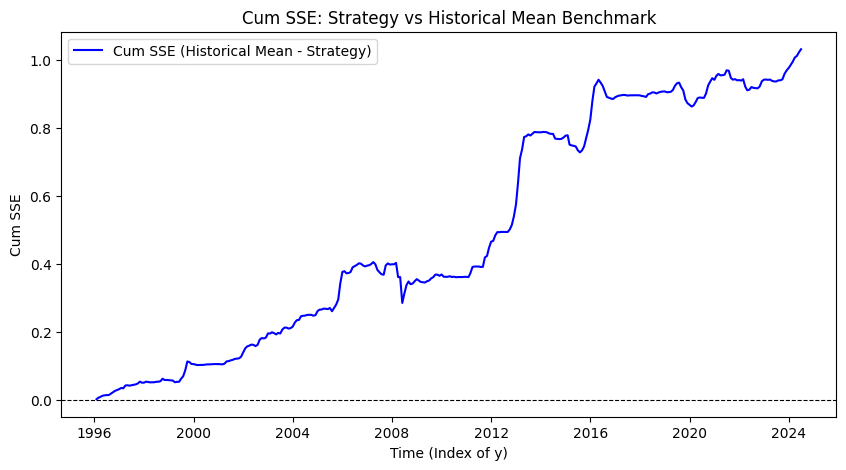

[{'Date': Timestamp('1996-01-31 00:00:00'),
  'GC1_1M_Ret': 0.0178176149122078,
  'GC1_3M_Ret': 0.019266675584313022,
  'GC1_6M_Ret': 0.05353730535104362,
  'GC1_12M_Ret': 0.0879970866081159,
  'const': 0.0,
  'SPX Index': 0.012365597364189714,
  'NDX Index': 0.004674466832744234,
  'DXY Curncy': 0.011222226288725589,
  'USGG10YR Index': 0.015754641925168796,
  'USGG2YR Index': 0.021407265705790133,
  'VIX Index': 0.0009645932137136118,
  'JPY Curncy': 0.01624811841231493,
  'LEGATRUU Index': 0.0,
  'EMUSTRUU Index': 0.0,
  'PE_RATIO': 0.0004970824389258035,
  'D/P Ratio': 0.003038292068900763,
  'Fed_Eff_Rate': 0.009608017332447406,
  'CPI YOY Index': 0.08713263103742915,
  'PCE CYOY Index': 0.16550316981420893,
  'GDP_Nominoal_YOY': 0.13981141684336912,
  'GDP_Real_QoQ': 0.0399975554369943,
  'US_Unemp': 0.11292437132574946,
  'Cons_Conf': 0.029909335889695136,
  'US_RIR': 0.07664902371754188,
  '1M_risk_free_ret_realized': 0.016627477496244224,
  'ETF_Ounces': 0.0,
  'Chinese_premiu

In [96]:
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')

# Record the cumulative sum of SSE
SSE_model_cumsum = []
SSE_historical_cumsum = []
# Store the feature importance of every step
feature_importance_per_step = []
# Use Random Forest for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# Record the actual value, the value predicted by our strategy and historical_mean_strategy
forest_results = []
# Get the index position
index_position = Y.index.get_loc(testing_start_date)
# Store the summaries of model
model_summaries = []
for t in tqdm(range(index_position, n_obs - 1), desc=f"Processing"):
    # Use all the value to train up to time t
    X_train = X.iloc[:t]
    y_train = Y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # Get the next step t+1
    X_test = X.iloc[t:t+1]
    y_actual = Y.iloc[t:t+1]
    y_actual = y_actual.iloc[0]
    # When the testing start
    current_date = Y.index[t]

    # Get the variables that are picked up by LASSO (those are not NA)
    #selected_features = LASSO_features_df.loc[current_date].dropna().index.tolist()
    selected_features = all_features_df.loc[current_date].dropna().index.tolist()
    # selected only the features that have been picked up by LASSO 
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # Train the regression model
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # Get the single predicted value
        # Get the feature importance
        if hasattr(model, "feature_importances_"):  
            feature_importance = model.feature_importances_
        else:
            print("Feature_importance_error")

        # Record the feature importance of this time step
        feature_importance_per_step.append({
            "Date": current_date,  # record the date
            **dict(zip(selected_features, feature_importance))
        })
        # calculate the forecasting error of our strategy
        forecast_error = float(y_actual - y_pred)
    else:
        # If LASSO selected no features, use a rolling historical mean to forecast instead
        forecast_error = float(y_actual -  y_historical_mean.tail(36).mean() * fwd_ret_period)

    # Calculate the error of using a rolling historical mean to predict (benchmark error) 
    historical_mean_error = float(y_actual -  y_historical_mean.tail(36).mean() * fwd_ret_period)

    # Calculate the SSE 
    if t == index_position:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # Record the result for this time step
    forest_results.append({
        "Date": Y.index[t],
        "ret_real": float(y_actual),
        "ret_pred": float(y_pred),
        "historical_mean":  y_historical_mean.tail(36).mean() * fwd_ret_period
    })
forest_results=pd.DataFrame(forest_results)
                    
SSE_diff_series = np.array(SSE_historical_cumsum)  - np.array(SSE_model_cumsum)

df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)
# calculate the mean value for the feature importance of all the features
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
df_feature_avg_importance=df_feature_avg_importance[1:]

df_feature_importance_per_step.set_index("Date", inplace=True)

# Plot the cumulative SSE 
plt.figure(figsize=(10, 5))
plt.plot(Y.index[index_position:n_obs - 1], SSE_diff_series, label="Cum SSE Difference (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("Cum SSE Difference")
plt.title("Cum SSE Difference: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # add the 0 baseline
plt.legend()
plt.show()


In [79]:
# This is the feature importance for each of the steps
df_feature_importance_per_step

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,0.017818,0.019267,0.053537,0.087997,0.0,0.012366,0.004674,0.011222,0.015755,0.021407,...,0.139811,0.039998,0.112924,0.029909,0.076649,0.016627,0.000000,0.000000,0.000000,0.057046
1996-02-29,0.017791,0.018548,0.050834,0.096452,0.0,0.011870,0.004536,0.011732,0.017579,0.019224,...,0.137278,0.041800,0.118500,0.027818,0.073403,0.015447,0.000000,0.000000,0.000000,0.053109
1996-03-31,0.018038,0.015727,0.052400,0.095915,0.0,0.012357,0.004685,0.009984,0.017317,0.020153,...,0.140803,0.038375,0.119324,0.028081,0.077833,0.013084,0.000000,0.000000,0.000000,0.049136
1996-04-30,0.018946,0.016034,0.052264,0.097597,0.0,0.012905,0.005163,0.010372,0.014095,0.019522,...,0.149426,0.040166,0.112520,0.024492,0.075374,0.014528,0.000000,0.000000,0.000000,0.054558
1996-05-31,0.017907,0.016597,0.049553,0.099058,0.0,0.013956,0.003838,0.010219,0.015323,0.019202,...,0.142851,0.045102,0.106757,0.025741,0.068257,0.016125,0.000000,0.000000,0.000000,0.064874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.019677,0.018154,0.046113,0.072912,0.0,0.013887,0.006456,0.014306,0.012668,0.018242,...,0.079164,0.072942,0.079828,0.029782,0.053111,0.028612,0.024305,0.011576,0.005245,0.045613
2024-03-31,0.019166,0.017737,0.050294,0.069234,0.0,0.013679,0.006811,0.013785,0.012857,0.018002,...,0.077157,0.076215,0.081549,0.030496,0.049087,0.027405,0.023324,0.011751,0.006059,0.045860
2024-04-30,0.019564,0.018984,0.045974,0.071807,0.0,0.011483,0.006691,0.013439,0.011319,0.015842,...,0.081376,0.075035,0.083194,0.032952,0.049808,0.027399,0.023343,0.013177,0.005260,0.044589


In [80]:
# This is the average feature importance of all the time steps
df_feature_avg_importance

,Feature,Avg Importance
1,GC1_1M_Ret,0.022664
2,GC1_3M_Ret,0.02236
3,GC1_6M_Ret,0.055551
4,GC1_12M_Ret,0.077671
5,const,0.0
6,SPX Index,0.010623
7,NDX Index,0.004555
8,DXY Curncy,0.013829
9,USGG10YR Index,0.011956
10,USGG2YR Index,0.015771


In [81]:
# This is the resulting dataframe of the random forest
forest_results

,Date,ret_real,ret_pred,historical_mean
0,1996-01-31,-0.018734,0.010167,0.024056
1,1996-02-29,-0.047490,-0.002736,0.032848
2,1996-03-31,-0.034305,0.005714,0.031607
3,1996-04-30,-0.048633,-0.000690,0.025034
4,1996-05-31,-0.038903,0.001934,0.014629
...,...,...,...,...
337,2024-02-29,0.167553,0.051504,0.016468
338,2024-03-31,0.196326,0.069890,0.027962
339,2024-04-30,0.171135,0.060975,0.042082
340,2024-05-31,0.175570,0.094637,0.043160


### 6 - Trading Strategy

##### **<font color= #90EE90>6.1 Trading Strategy Plot </font>**

In [83]:
# set the possible transaction cost to the strategy
transaction_cost=[0,0.001]
# We doesn't apply a transaction cost to the historical mean prediction benchmark
benchmark_bp=0.000
# only predicted excess return excess this benchmark will be taken long position to decrease the impact of noise
excess_ret_benchmark=0.02
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.loc[testing_start_date:]
monthly_risk_free_rate=np.log(1+raw_df_al_risk_free_rate/1200)

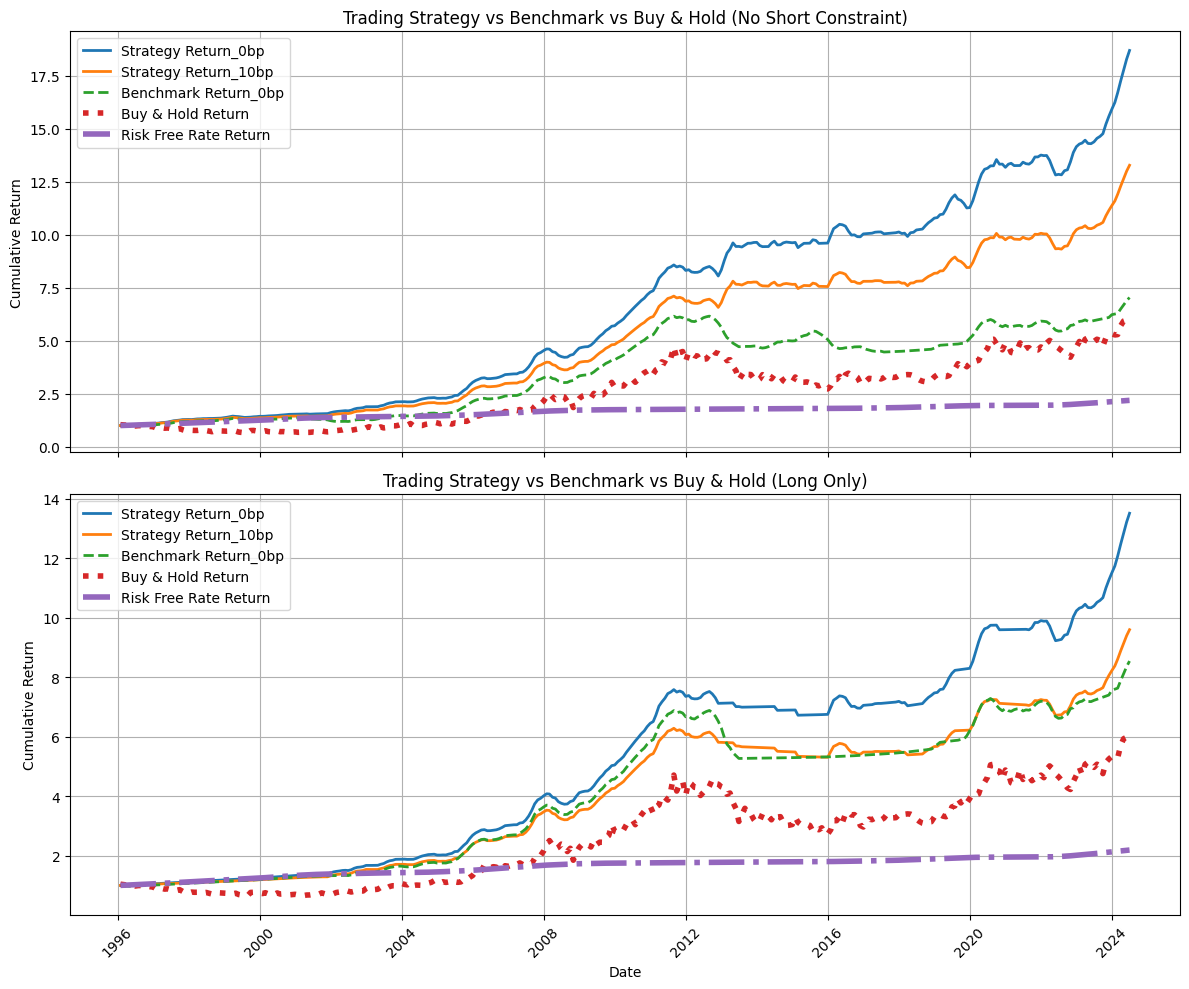

In [84]:
# Plot the cumulative return of random forest model
forest_long_short_performance_df,forest_long_only_performance_df=gpf.trading_plot(gc_data,GC_type,fwd_ret_period,monthly_risk_free_rate,excess_ret_benchmark,forest_results,transaction_cost)

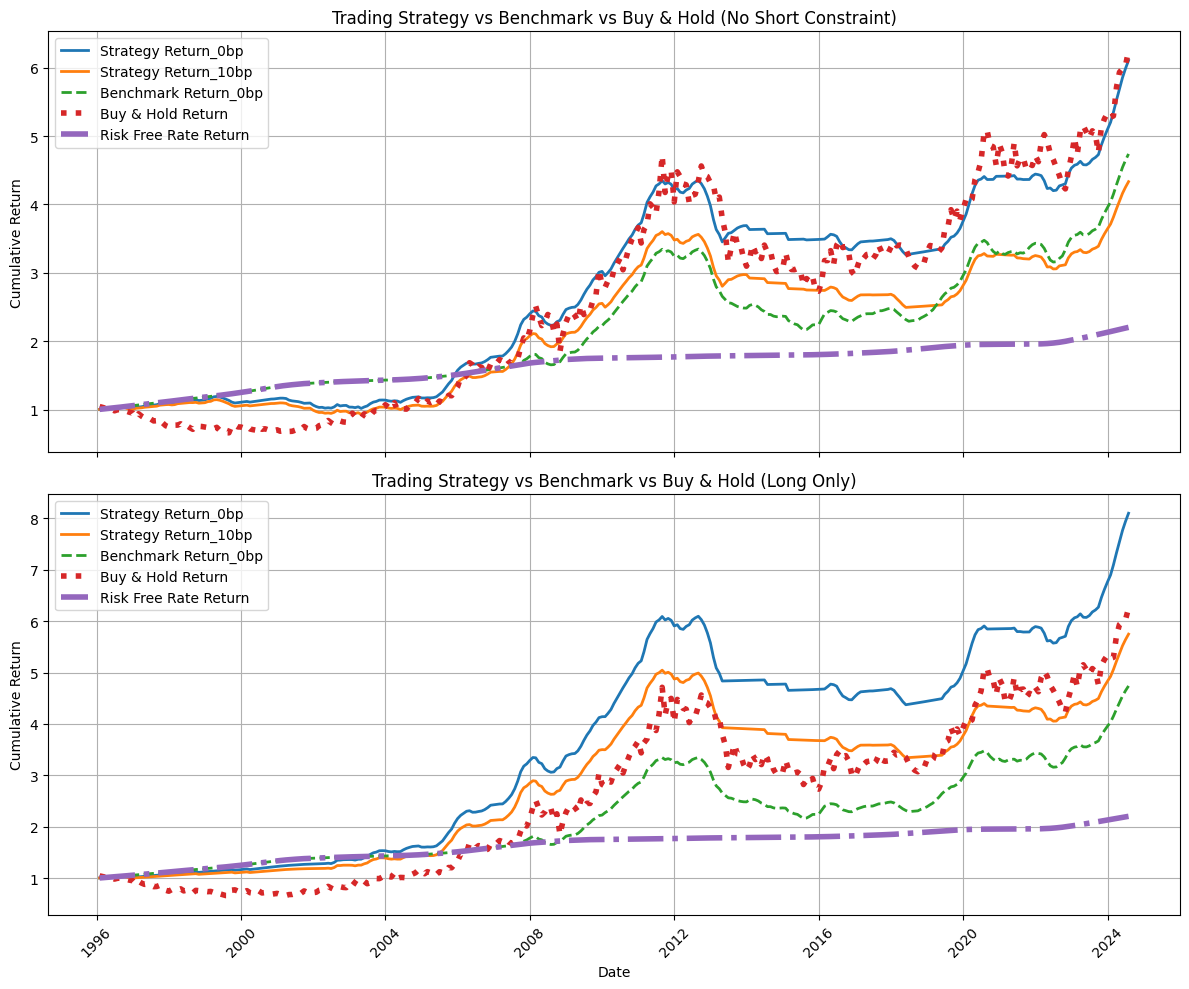

In [85]:
# Plot the cumulative return of LASSO model
LASSO_long_short_performance_df,LASSO_long_only_performance_df=gpf.trading_plot(gc_data,GC_type,fwd_ret_period,monthly_risk_free_rate,excess_ret_benchmark,LASSO_result,transaction_cost)

In [86]:
# This method add performance matrices like max_drawdown and SSE difference (each step)
gpf.add_performance_matrices(forest_long_short_performance_df)
gpf.add_performance_matrices(forest_long_only_performance_df)
gpf.add_performance_matrices(LASSO_long_short_performance_df)
gpf.add_performance_matrices(LASSO_long_only_performance_df)
forest_long_short_performance_df

,ret_real,ret_pred,historical_mean,strategy_return_0bp,strategy_action,cumulative_strategy_0bp,strategy_return_10bp,cumulative_strategy_10bp,benchmark_return,benchmark_action,...,strategy_win_rate,benchmark_win_rate,strategy_correct_percent,benchmark_correct_percent,strategy_SSE,benchmark_SSE,SSE_difference,cumulative_strategy_SSE,cumulative_benchmark_SSE,cumulative_SSE_difference
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,-0.018734,0.010167,0.024056,0.004513,risk_free,1.004524,0.003513,1.003520,-0.003122,long,...,False,False,-1.000000,-1.000000,0.000835,0.001831,0.000996,0.000835,0.001831,0.000996
1996-02-29,-0.047490,-0.002736,0.032848,0.004308,risk_free,1.008860,0.003308,1.006844,-0.007915,long,...,True,False,0.891045,-1.000000,0.002003,0.006454,0.004451,0.002838,0.008285,0.005447
1996-03-31,-0.034305,0.005714,0.031607,0.004497,risk_free,1.013407,0.003497,1.010371,-0.005717,long,...,False,False,-1.000000,-1.000000,0.001601,0.004344,0.002743,0.004440,0.012630,0.008190
1996-04-30,-0.048633,-0.000690,0.025034,0.004618,risk_free,1.018098,0.003618,1.014034,-0.008106,long,...,True,False,0.972037,-1.000000,0.002299,0.005427,0.003128,0.006738,0.018057,0.011318
1996-05-31,-0.038903,0.001934,0.014629,0.004657,risk_free,1.022850,0.003657,1.017749,0.004657,risk_free,...,False,False,-1.000000,-1.000000,0.001668,0.002866,0.001198,0.008406,0.020922,0.012516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.167553,0.051504,0.016468,0.027926,long,16.707448,0.026926,11.915673,0.004697,risk_free,...,True,True,0.529768,0.821021,0.013467,0.022827,0.009359,2.703474,3.698230,0.994757
2024-03-31,0.196326,0.069890,0.027962,0.032721,long,17.263174,0.031721,12.299709,0.032721,long,...,True,True,0.474939,0.750657,0.015986,0.028346,0.012360,2.719460,3.726577,1.007117
2024-04-30,0.171135,0.060975,0.042082,0.028522,long,17.762652,0.027522,12.642928,0.028522,long,...,True,True,0.474600,0.605265,0.012135,0.016655,0.004519,2.731595,3.743231,1.011636


##### **<font color= #90EE90>6.2 Win Rate Plot </font>**

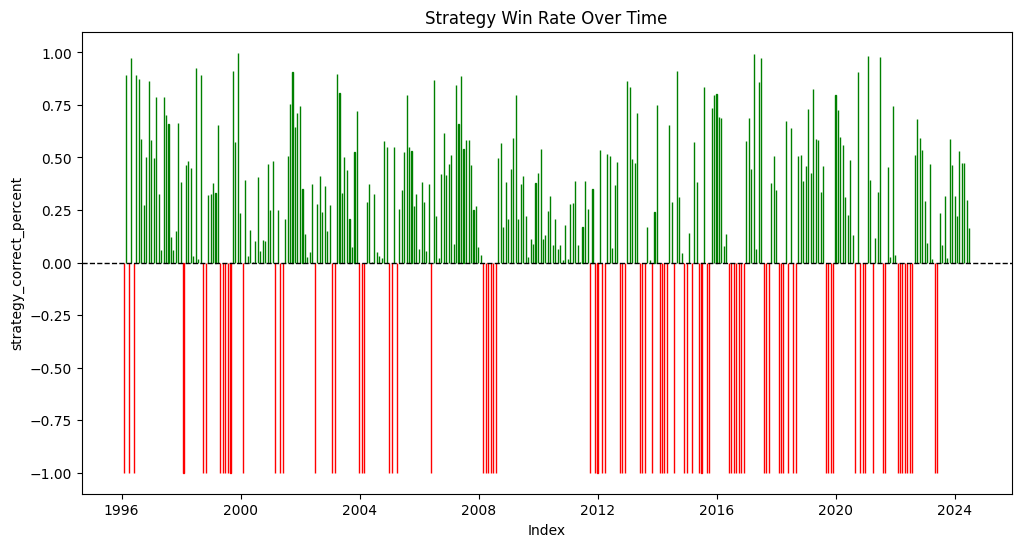

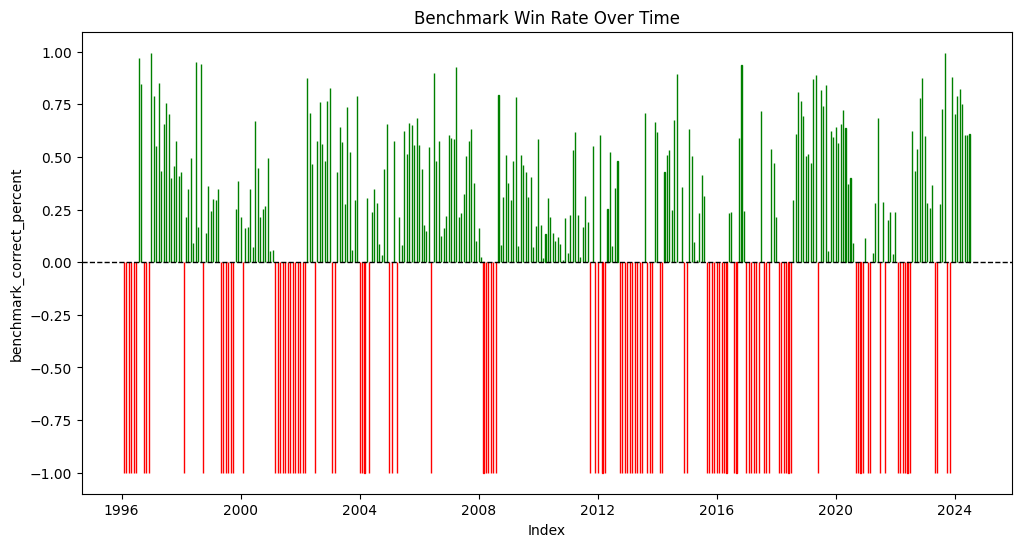

In [87]:
# Plot strategy win rate
gpf.plot_win_rate(forest_long_short_performance_df, "strategy_correct_percent", "Strategy Win Rate Over Time")
# Plot benchmark win rate
gpf.plot_win_rate(forest_long_short_performance_df, "benchmark_correct_percent", "Benchmark Win Rate Over Time")

##### **<font color= #90EE90>6.3 Trading strategy performance matrices </font>**

In [88]:
forest_long_short_performance_output=gpf.performance_calculator(forest_long_short_performance_df,monthly_risk_free_rate,fwd_ret_period,transaction_cost,benchmark_bp=0)
forest_long_only_performance_output=gpf.performance_calculator(forest_long_only_performance_df,monthly_risk_free_rate,fwd_ret_period,transaction_cost,benchmark_bp=0)
LASSO_long_short_performance_output=gpf.performance_calculator(LASSO_long_short_performance_df,monthly_risk_free_rate,fwd_ret_period,transaction_cost,benchmark_bp=0)
LASSO_long_only_performance_output=gpf.performance_calculator(LASSO_long_only_performance_df,monthly_risk_free_rate,fwd_ret_period,transaction_cost,benchmark_bp=0)
forest_long_short_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown,Win Rate,R2
0,Strategy,0bp,18.698856,0.108218,1.549186,-0.085766,0.733918,0.217401
1,Strategy,10bp,13.282699,0.094999,1.294110,-0.091235,0.733918,0.217401
2,Benchmark,0bp,7.044081,0.000476,0.766466,-0.274706,0.663743,-0.077197
3,Buy & Hold,-,6.028343,0.000438,0.228046,-0.420434,NaN,NaN


In [89]:
# Adding drawdowns (each step) to the dataframe
forest_long_short_performance_df=gpf.calculate_drawdowns(forest_long_short_performance_df,transaction_cost)
forest_long_only_performance_df=gpf.calculate_drawdowns(forest_long_only_performance_df,transaction_cost)
LASSO_long_short_performance_df=gpf.calculate_drawdowns(LASSO_long_short_performance_df,transaction_cost)
LASSO_long_only_performance_df=gpf.calculate_drawdowns(LASSO_long_only_performance_df,transaction_cost)
forest_long_short_performance_df

,ret_real,ret_pred,historical_mean,strategy_return_0bp,strategy_action,cumulative_strategy_0bp,strategy_return_10bp,cumulative_strategy_10bp,benchmark_return,benchmark_action,...,cumulative_benchmark_SSE,cumulative_SSE_difference,drawdown_strategy_0bp,max_drawdown_strategy_0bp,drawdown_strategy_10bp,max_drawdown_strategy_10bp,drawdown_benchmark,max_drawdown_benchmark,drawdown_buy_and_hold,max_drawdown_buy_and_hold
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,-0.018734,0.010167,0.024056,0.004513,risk_free,1.004524,0.003513,1.003520,-0.003122,long,...,0.001831,0.000996,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1996-02-29,-0.047490,-0.002736,0.032848,0.004308,risk_free,1.008860,0.003308,1.006844,-0.007915,long,...,0.008285,0.005447,0.0,0.000000,0.0,0.000000,-0.007884,-0.007884,-0.010848,-0.010848
1996-03-31,-0.034305,0.005714,0.031607,0.004497,risk_free,1.013407,0.003497,1.010371,-0.005717,long,...,0.012630,0.008190,0.0,0.000000,0.0,0.000000,-0.013540,-0.013540,-0.024162,-0.024162
1996-04-30,-0.048633,-0.000690,0.025034,0.004618,risk_free,1.018098,0.003618,1.014034,-0.008106,long,...,0.018057,0.011318,0.0,0.000000,0.0,0.000000,-0.021503,-0.021503,-0.029832,-0.029832
1996-05-31,-0.038903,0.001934,0.014629,0.004657,risk_free,1.022850,0.003657,1.017749,0.004657,risk_free,...,0.020922,0.012516,0.0,0.000000,0.0,0.000000,-0.016936,-0.021503,-0.036243,-0.036243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,0.167553,0.051504,0.016468,0.027926,long,16.707448,0.026926,11.915673,0.004697,risk_free,...,3.698230,0.994757,0.0,-0.085766,0.0,-0.091235,0.000000,-0.274706,-0.008254,-0.420434
2024-03-31,0.196326,0.069890,0.027962,0.032721,long,17.263174,0.031721,12.299709,0.032721,long,...,3.726577,1.007117,0.0,-0.085766,0.0,-0.091235,0.000000,-0.274706,0.000000,-0.420434
2024-04-30,0.171135,0.060975,0.042082,0.028522,long,17.762652,0.027522,12.642928,0.028522,long,...,3.743231,1.011636,0.0,-0.085766,0.0,-0.091235,0.000000,-0.274706,0.000000,-0.420434


In [97]:
forest_long_short_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown,Win Rate,R2
0,Strategy,0bp,18.698856,0.108218,1.549186,-0.085766,0.733918,0.217401
1,Strategy,10bp,13.282699,0.094999,1.294110,-0.091235,0.733918,0.217401
2,Benchmark,0bp,7.044081,0.000476,0.766466,-0.274706,0.663743,-0.077197
3,Buy & Hold,-,6.028343,0.000438,0.228046,-0.420434,NaN,NaN


In [90]:
forest_long_only_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown,Win Rate,R2
0,Strategy,0bp,13.513472,0.095661,1.420402,-0.113515,0.733918,0.217401
1,Strategy,10bp,9.599270,0.082591,1.146301,-0.154862,0.733918,0.217401
2,Benchmark,0bp,8.544746,0.000523,1.008825,-0.234384,0.663743,-0.077197
3,Buy & Hold,-,6.028343,0.000438,0.228046,-0.420434,NaN,NaN


In [91]:
LASSO_long_short_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown,Win Rate,R2
0,Strategy,0bp,8.098066,0.075920,0.937320,-0.282356,0.609329,-0.103162
1,Strategy,10bp,5.746697,0.063086,0.686163,-0.337676,0.609329,-0.103162
2,Benchmark,0bp,4.739105,0.000378,0.603103,-0.353671,0.606414,-0.020356
3,Buy & Hold,-,6.252254,0.000445,0.235538,-0.420434,NaN,NaN


In [92]:
LASSO_long_only_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown,Win Rate,R2
0,Strategy,0bp,8.098066,0.075920,0.937320,-0.282356,0.609329,-0.103162
1,Strategy,10bp,5.746697,0.063086,0.686163,-0.337676,0.609329,-0.103162
2,Benchmark,0bp,4.739105,0.000378,0.603103,-0.353671,0.606414,-0.020356
3,Buy & Hold,-,6.252254,0.000445,0.235538,-0.420434,NaN,NaN
